
# AKATHON PROGRAMMING COMMUNITY by **AKAABO AKAADIDOO**
### Attendance Data Cleaning & Analysis (Pandas + Matplotlib)

**Objective:**  
This notebook cleans and analyzes an attendance Excel file using **pandas** and **matplotlib**.

## Tasks Covered
1. Aggregate attendance by Matriculation Number  
2. Compute attendance score (occurrence × 5)  
3. Order records by Department  
4. Export attendance files per department using Regular Expressions  
5. Perform and document multiple visualizations using matplotlib  

---
## *NOTE: This data has **not been cleaned properly** before visualization to emphasize the importance of Data Cleaning*
---

In [1]:

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import re

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width',None)



## Step 1: Load the Attendance File
We load the Excel attendance file using pandas.


In [2]:

# Load attendance file
file_path = "attendance.xlsx"
df = pd.read_excel(file_path)

# Preview the data
df.head()


,Timestamp,Email address,JAMB REG. NO (In Upper Case),MATRIC NO. (In Upper Case),SURNAME (In Upper Case),OTHER NAME(S),DEPARTMENT (In Upper Case),FACULTY (In Upper Case),DATE OF BIRTH,STATE OF ORIGIN (In Upper Case),LGA (In Upper Case)
0,2025-01-14 00:22:14.822,tananaugustine@gmail.com,202210182915BA,PLASU/2023/FNAS/0840,AUGUSTINE,NaN,TANAN,NATURAL AND APPLIED SCIENCE,2003-01-15 00:00:00,PLATEAU STATE,MIKANG
1,2025-01-14 00:26:01.488,angeljohnfeng@gmail.com,202211341850FA,PLASU/2024/FNAS/0795,JOHN,ANGEL GYANG,MATHEMATICS,NATURAL AND APPLIED SCIENCE,2004-05-01 00:00:00,PLATEAU STATE,BARKIN LADI
2,2025-01-14 00:29:11.078,LONGJIDANLADIMASHAT@GMAIL.COM,202210412499HA,PLASU/2023/FNAS/0406,MASHAT,LONGJI DANLADI,MATHEMATICS,NATURAL AND APPLIED SCIENCES,2001-05-15 00:00:00,PLATEAU STATE,BOKKOS
3,2025-01-14 00:35:03.542,bejigodwin@gmail.com,202211291970HF,PLASU/2023/FNAS/0348,Godwin,Abel Beji,MATHEMATICS,Natural and applied science,2003-01-18 00:00:00,Plateau state,Kanke
4,2025-01-14 01:00:57.304,tananaugustine@gmail.com,202210182915BA,PLASU/2023FNAS/0840,AUGUSTINE,TANAN,MATHEMATICS,NATURAL AND APPLIED SCIENCE,2003-01-15 00:00:00,PLATEAU,MIKANG



## Step 2: Basic Cleaning
- Remove completely empty rows  
- Standardize column names  


In [3]:

# Drop empty rows
df.dropna(how="all", inplace=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df.head()


,timestamp,email_address,jamb_reg._no_(in_upper_case),matric_no._(in_upper_case),surname__(in_upper_case),other_name(s),department_(in_upper_case),faculty__(in_upper_case),date_of_birth,state_of_origin_(in_upper_case),lga__(in_upper_case)
0,2025-01-14 00:22:14.822,tananaugustine@gmail.com,202210182915BA,PLASU/2023/FNAS/0840,AUGUSTINE,NaN,TANAN,NATURAL AND APPLIED SCIENCE,2003-01-15 00:00:00,PLATEAU STATE,MIKANG
1,2025-01-14 00:26:01.488,angeljohnfeng@gmail.com,202211341850FA,PLASU/2024/FNAS/0795,JOHN,ANGEL GYANG,MATHEMATICS,NATURAL AND APPLIED SCIENCE,2004-05-01 00:00:00,PLATEAU STATE,BARKIN LADI
2,2025-01-14 00:29:11.078,LONGJIDANLADIMASHAT@GMAIL.COM,202210412499HA,PLASU/2023/FNAS/0406,MASHAT,LONGJI DANLADI,MATHEMATICS,NATURAL AND APPLIED SCIENCES,2001-05-15 00:00:00,PLATEAU STATE,BOKKOS
3,2025-01-14 00:35:03.542,bejigodwin@gmail.com,202211291970HF,PLASU/2023/FNAS/0348,Godwin,Abel Beji,MATHEMATICS,Natural and applied science,2003-01-18 00:00:00,Plateau state,Kanke
4,2025-01-14 01:00:57.304,tananaugustine@gmail.com,202210182915BA,PLASU/2023FNAS/0840,AUGUSTINE,TANAN,MATHEMATICS,NATURAL AND APPLIED SCIENCE,2003-01-15 00:00:00,PLATEAU,MIKANG


In [4]:
for col in df.columns:
    print(repr(col))


'timestamp'
'email_address'
'jamb_reg._no_(in_upper_case)'
'matric_no._(in_upper_case)'
'surname__(in_upper_case)'
'other_name(s)'
'department_(in_upper_case)'
'faculty__(in_upper_case)'
'date_of_birth'
'state_of_origin_(in_upper_case)'
'lga__(in_upper_case)'


In [5]:
# df.columns = (
#     df.columns
#     .str.strip()              # remove leading/trailing spaces
#     .str.lower()              # make lowercase
#     .str.replace(" ", "_")    # replace spaces with underscores
# )
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[().]", "", regex=True)
)


In [6]:
df.columns


Index(['timestamp', 'email_address', 'jamb_reg_no_in_upper_case',
       'matric_no_in_upper_case', 'surname__in_upper_case', 'other_names',
       'department_in_upper_case', 'faculty__in_upper_case', 'date_of_birth',
       'state_of_origin_in_upper_case', 'lga__in_upper_case'],
      dtype='object')


## Step 3: Aggregate Attendance by Matriculation Number
We count how many times each student signed the attendance.


In [7]:
df['full_name'] = (
    df['surname__in_upper_case'].str.title() + " " +
    df['other_names'].str.title()
)


In [8]:
attendance_count = (
    df.groupby([
        'matric_no_in_upper_case',
        'full_name',
        'department_in_upper_case'
    ])
    .size()
    .reset_index(name='attendance_count')
)


In [9]:
attendance_count

,matric_no_in_upper_case,full_name,department_in_upper_case,attendance_count
0,483,Bethel Yohanna,COMPUTER SCIENCE,1
1,483,Yohanna Bethel,Computer science,1
2,PLASU/20232/FNAS/0587,Moses Timbut Newton,PHYSICS,1
3,0173,Dabang Mundem Emmanuel,Medical laboratory Science,1
4,0216,Maren Patience Nathaniel,Medical laboratory science,1
...,...,...,...,...
932,plASU/2023/FNAS/0411,Ngufer Dorathy Martins,Computer science,1
933,plasu/2023/FNAS/0692,Gyang Dahlo Bitrus,Computer science,1
934,plasu/2023/fans/0333,Makwin Emmanuella Ayuba,Physics,1
935,plasu/2023/fnas/0333,Makwin Emmanuella Ayuba,Physics,1


In [10]:

# attendance_count = (
#     df.groupby(['matriculation_number', 'name', 'department'])
#     .size()
#     .reset_index(name='attendance_count')
# )

# attendance_count.head()



## Step 4: Compute Attendance Score
Each attendance occurrence is multiplied by **5 marks**.


In [11]:

attendance_count['attendance_score'] = attendance_count['attendance_count'] * 5
attendance_count.head()


,matric_no_in_upper_case,full_name,department_in_upper_case,attendance_count,attendance_score
0,483,Bethel Yohanna,COMPUTER SCIENCE,1,5
1,483,Yohanna Bethel,Computer science,1,5
2,PLASU/20232/FNAS/0587,Moses Timbut Newton,PHYSICS,1,5
3,0173,Dabang Mundem Emmanuel,Medical laboratory Science,1,5
4,0216,Maren Patience Nathaniel,Medical laboratory science,1,5



## Step 5: Order Records by Department


In [12]:
df.columns


Index(['timestamp', 'email_address', 'jamb_reg_no_in_upper_case',
       'matric_no_in_upper_case', 'surname__in_upper_case', 'other_names',
       'department_in_upper_case', 'faculty__in_upper_case', 'date_of_birth',
       'state_of_origin_in_upper_case', 'lga__in_upper_case', 'full_name'],
      dtype='object')

In [13]:

attendance_count.sort_values(by='department_in_upper_case', inplace=True)
attendance_count.head()


,matric_no_in_upper_case,full_name,department_in_upper_case,attendance_count,attendance_score
721,PLASU/2023/FNAS/0854,Istifanus Gungret Philibus,PLANT SCIENCE AND BIOTECHNOLOGY,1,5
589,PLASU/2023/FNAS/0612,Damang Hope,APOLLOS,1,5
77,PLASU/2021/FNAS/0028,Stephen Naannoegoen,BIOCHEMISTRY,1,5
78,PLASU/2021/FNAS/0028,Stephen Naannoegoen,BIOCHEMISTRY,1,5
84,PLASU/2021/FNAS/0104,Yohanna Abi Grace,BIOCHEMISTRY,1,5



## Step 6: Export Attendance by Department (Regex-Based)
Each department is exported into a separate Excel file.


In [14]:

for dept in attendance_count['department_in_upper_case'].unique():
    # Clean department name using regex
    safe_dept = re.sub(r'[^a-zA-Z0-9]', '_', dept.lower())
    
    dept_df = attendance_count[attendance_count['department_in_upper_case'] == dept]
    dept_df.to_excel(f"attendance_{safe_dept}.xlsx", index=False)

print("Department-wise files exported successfully.")


Department-wise files exported successfully.



## Step 7: Visualizations with Matplotlib
All plots are created using **matplotlib** only.


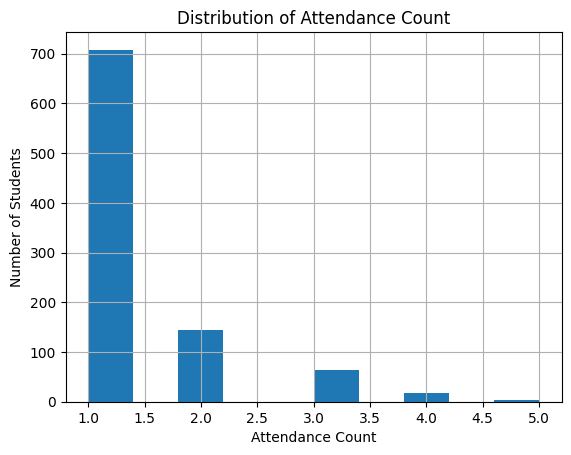

In [15]:

# 1. Attendance count distribution
plt.figure()
attendance_count['attendance_count'].hist()
plt.title("Distribution of Attendance Count")
plt.xlabel("Attendance Count")
plt.ylabel("Number of Students")
plt.show()


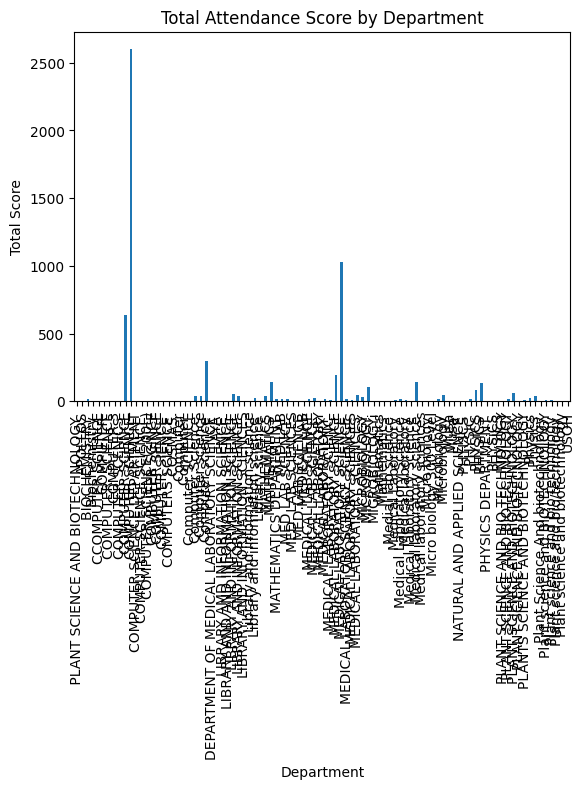

In [16]:

# 2. Attendance score by department
plt.figure()
attendance_count.groupby('department_in_upper_case')['attendance_score'].sum().plot(kind='bar')
plt.title("Total Attendance Score by Department")
plt.xlabel("Department")
plt.ylabel("Total Score")
plt.show()


In [17]:
df.columns


Index(['timestamp', 'email_address', 'jamb_reg_no_in_upper_case',
       'matric_no_in_upper_case', 'surname__in_upper_case', 'other_names',
       'department_in_upper_case', 'faculty__in_upper_case', 'date_of_birth',
       'state_of_origin_in_upper_case', 'lga__in_upper_case', 'full_name'],
      dtype='object')

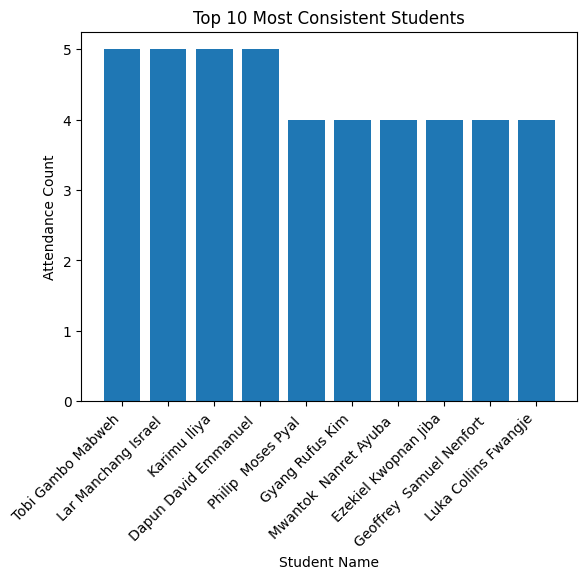

In [18]:

# Top 10 most consistent students
top_students = attendance_count.sort_values(
    by='attendance_count',
    ascending=False
).head(10)

plt.figure()
plt.bar(top_students['full_name'], top_students['attendance_count'])
plt.title("Top 10 Most Consistent Students")
plt.xlabel("Student Name")
plt.ylabel("Attendance Count")
plt.xticks(rotation=45, ha='right')
plt.show()



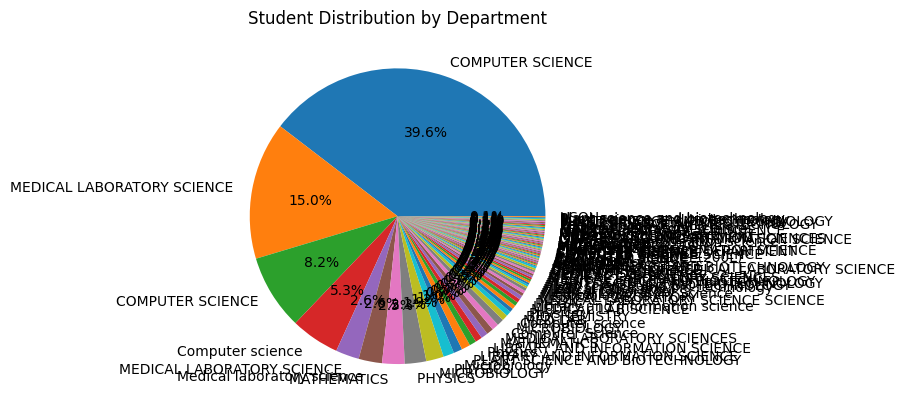

In [19]:

# 4. Department-wise student count
plt.figure()
attendance_count['department_in_upper_case'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Student Distribution by Department")
plt.ylabel("")
plt.show()



## Conclusion
This notebook:
- Cleans attendance data  
- Computes attendance metrics  
- Exports department-level reports  
- Generates multiple insightful visualizations  

All tasks were completed in **one single Jupyter Notebook** using pandas and matplotlib.
